In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#import libraries and load data

music = pd.read_csv("C:\\Users\\nelso\\Desktop\\music_genre.csv")

music_df = pd.DataFrame(music)

#For EDA 
music_df = music_df.replace({ "tempo": {"?":-1}})

music_df.head(10)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,-1,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.948,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


In [8]:
music_df.shape #dataset consists of 50,005 records

(50005, 18)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<AxesSubplot:xlabel='music_genre', ylabel='popularity'>

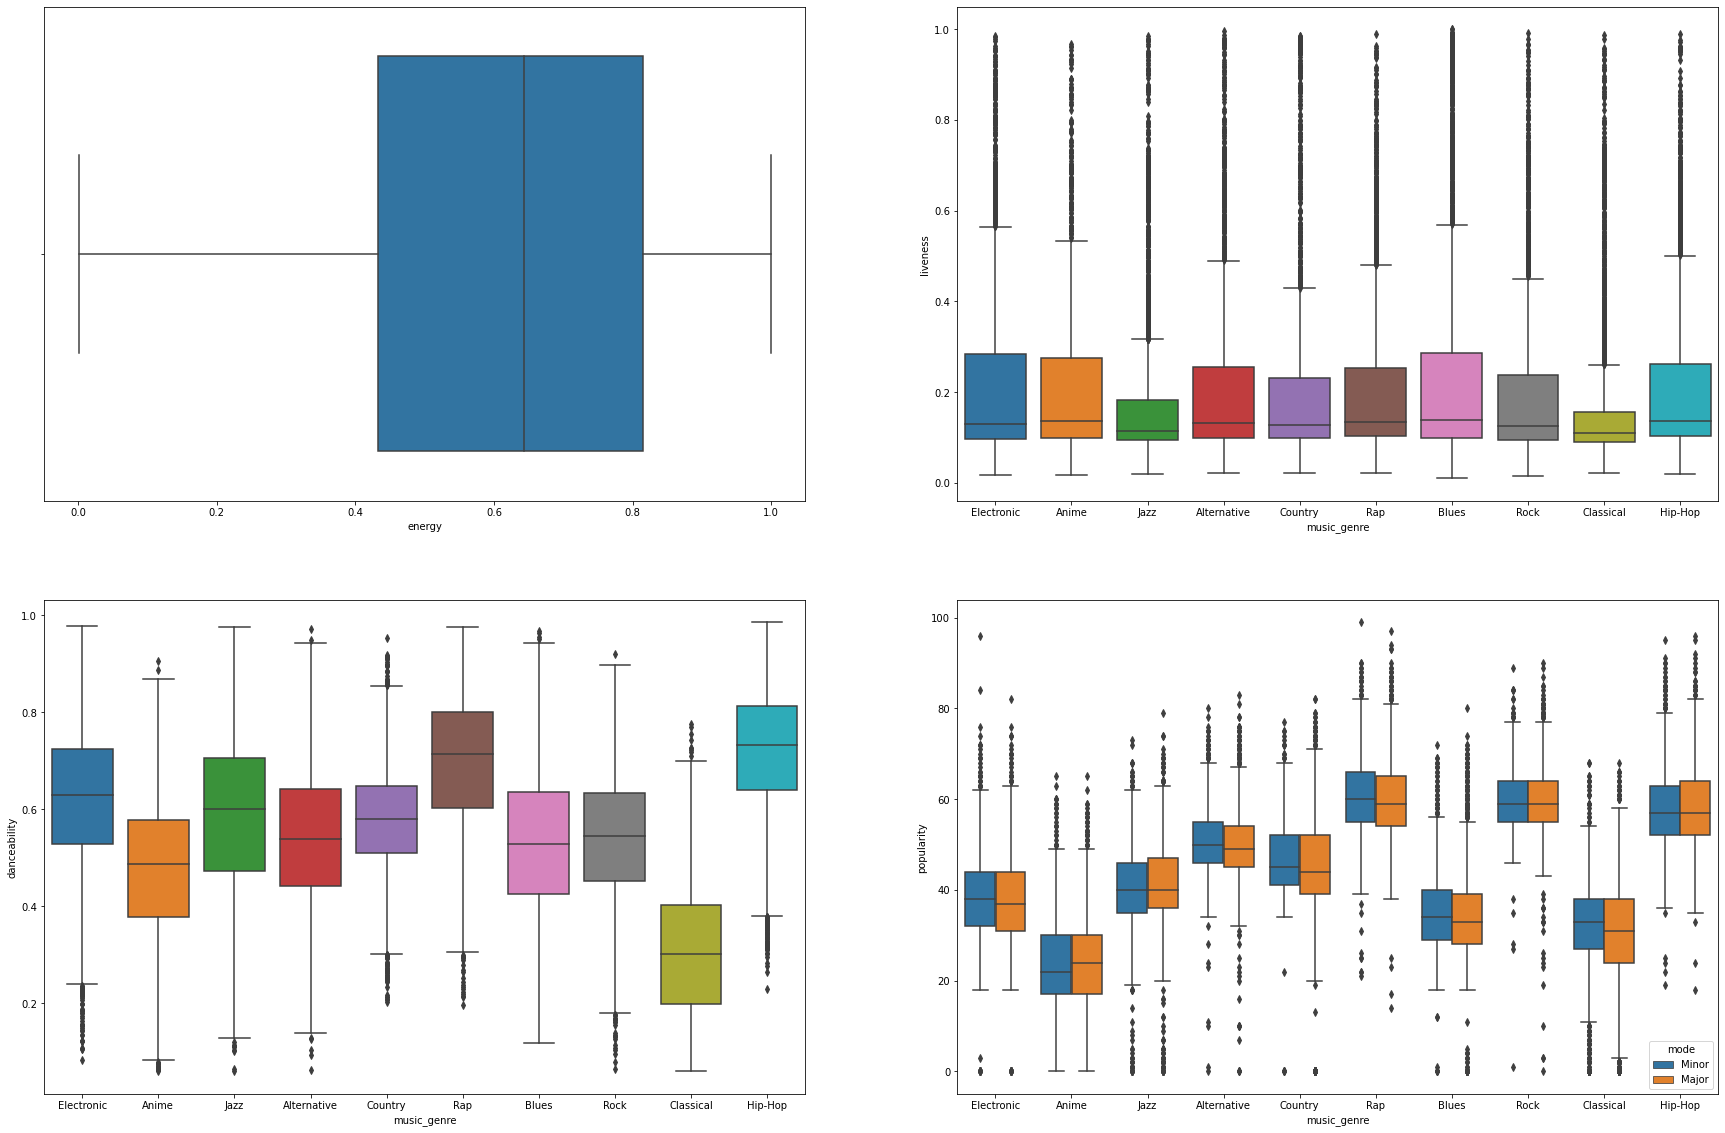

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax = ax.flatten()
print(ax)


sns.boxplot(x=music_df["energy"], ax=ax[0])
sns.boxplot(x=music_df["music_genre"],y= music_df["liveness"] , ax=ax[1])
sns.boxplot(x=music_df["music_genre"],y= music_df["danceability"] , ax=ax[2])
sns.boxplot(x=music_df["music_genre"],y= music_df["popularity"] , hue = music_df["mode"], ax=ax[3])



[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<AxesSubplot:xlabel='loudness', ylabel='Count'>

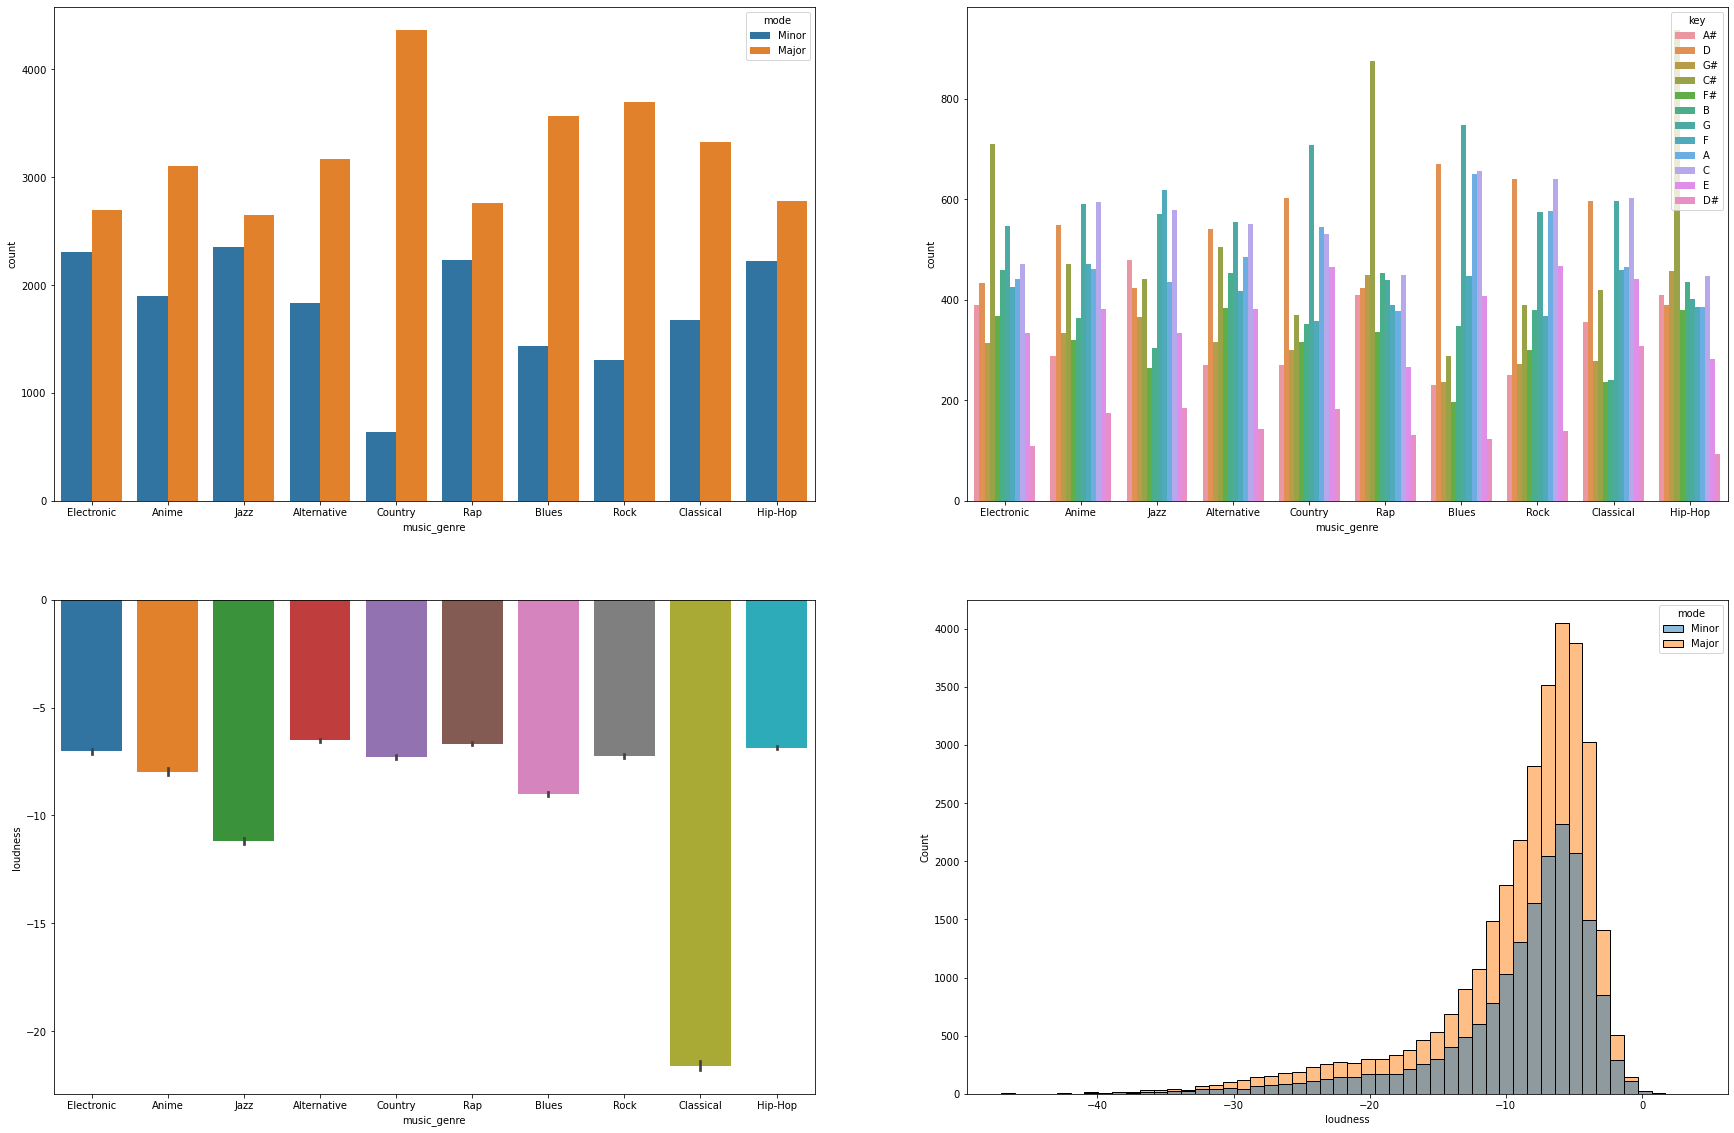

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax = ax.flatten()
print(ax)


sns.countplot(data=music_df,x= "music_genre", hue="mode", ax=ax[0])
sns.countplot(x=music_df["music_genre"],hue=music_df["key"], ax=ax[1])
sns.barplot(x="music_genre", y="loudness", data=music_df, ax=ax[2])
sns.histplot(data=music_df, x="loudness",hue="mode", bins=50,ax=ax[3])

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<AxesSubplot:xlabel='music_genre', ylabel='valence'>

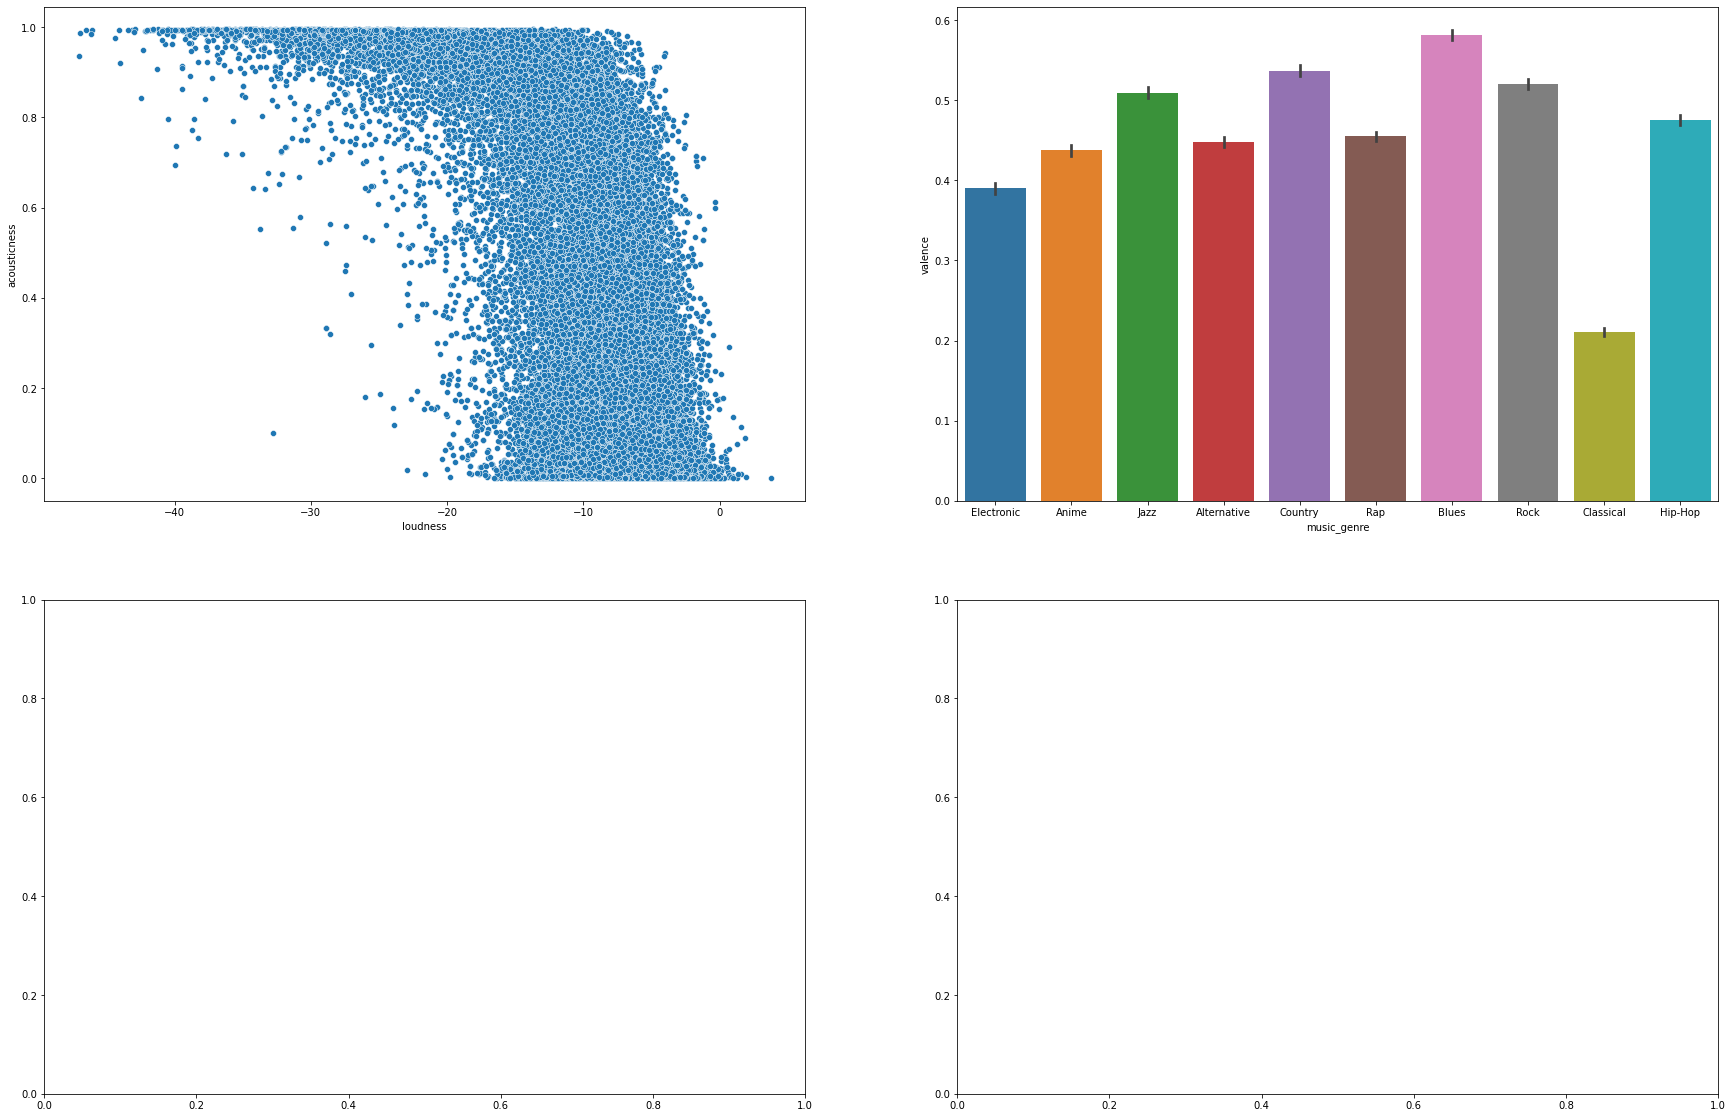

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax = ax.flatten()
print(ax)


sns.scatterplot(x="loudness", y="acousticness", data=music_df, ax=ax[0]);
sns.barplot(x="music_genre", y="valence", data=music_df, ax=ax[1])


In [26]:
#created a correlation table

music_df.corr(method="pearson", min_periods=1)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.006317,-0.005268,0.000372,-0.005848,0.009952,-0.004015,0.004737,0.006847,-0.005908,0.005385
popularity,0.006317,1.000000,-0.290453,0.356420,-0.083809,0.216345,-0.364960,-0.039468,0.317941,0.224309,0.124913
acousticness,-0.005268,-0.290453,1.000000,-0.347681,0.061862,-0.791250,0.387970,-0.109220,-0.730401,-0.163377,-0.270238
danceability,0.000372,0.356420,-0.347681,1.000000,-0.155507,0.263934,-0.301277,-0.051465,0.390859,0.279767,0.434557
duration_ms,-0.005848,-0.083809,0.061862,-0.155507,1.000000,-0.066203,0.129738,0.019911,-0.102509,-0.083636,-0.130574
energy,0.009952,0.216345,-0.791250,0.263934,-0.066203,1.000000,-0.389730,0.186731,0.838399,0.158180,0.396317
instrumentalness,-0.004015,-0.364960,0.387970,-0.301277,0.129738,-0.389730,1.000000,-0.093537,-0.529030,-0.199137,-0.272780
liveness,0.004737,-0.039468,-0.109220,-0.051465,0.019911,0.186731,-0.093537,1.000000,0.126504,0.114475,0.052110
loudness,0.006847,0.317941,-0.730401,0.390859,-0.102509,0.838399,-0.529030,0.126504,1.000000,0.165578,0.340664
speechiness,-0.005908,0.224309,-0.163377,0.279767,-0.083636,0.158180,-0.199137,0.114475,0.165578,1.000000,0.059847
